# Visual Explanation of **Gradient Descent**
Using 1D and 2D Examples </br>
For easier understanding, I have added the values at every iteration next to the plots

### Imports

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec
import random

### 1D Example

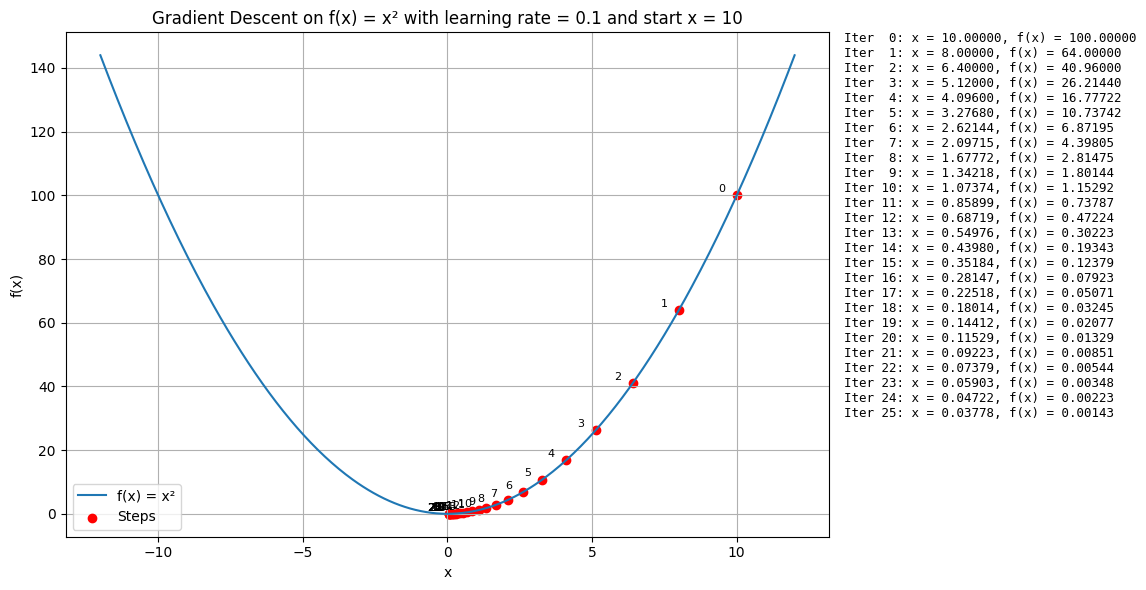

In [31]:
def f(x):
    return x**2

def df(x):
    return 2 * x

def gradient_descent_1d(start_x, learning_rate, num_iterations):
    x = start_x
    history = [(x, f(x))]  

    for i in range(num_iterations):
        grad = df(x)
        x = x - learning_rate * grad
        history.append((x, f(x)))
    
    return x, f(x), history

# ------- Parameters -------
#start_x = 10
start_x = random.randint(10,10) # 10 is the easiest example. Change the range for more complex examples
learning_rate = 0.1
num_iterations = 25

x_min, f_min, history = gradient_descent_1d(start_x, learning_rate, num_iterations)

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

ax0 = fig.add_subplot(gs[0])
x_vals = np.linspace(-12, 12, 400) # generate 400 numbers between -12 and 12
y_vals = f(x_vals)
ax0.plot(x_vals, y_vals, label='f(x) = x²')
xs, ys = zip(*history)
ax0.scatter(xs, ys, color='red', label='Steps')

for i, (x, y) in enumerate(history):
    ax0.text(x, y + 1, f"{i}        ", fontsize=8, ha='center')

ax0.set_title(f'Gradient Descent on f(x) = x² with learning rate = {learning_rate} and start x = {start_x}')
ax0.set_xlabel('x')
ax0.set_ylabel('f(x)')
ax0.grid(True)
ax0.legend()

ax1 = fig.add_subplot(gs[1])
ax1.axis('off')
text_lines = [f"Iter {i:2d}: x = {x:.5f}, f(x) = {y:.5f}" for i, (x, y) in enumerate(history)]
full_text = "\n".join(text_lines)
ax1.text(0, 1, full_text, va='top', fontsize=9, family='monospace')

plt.tight_layout()
plt.show()

### 1D Example With Lower Learning Rate

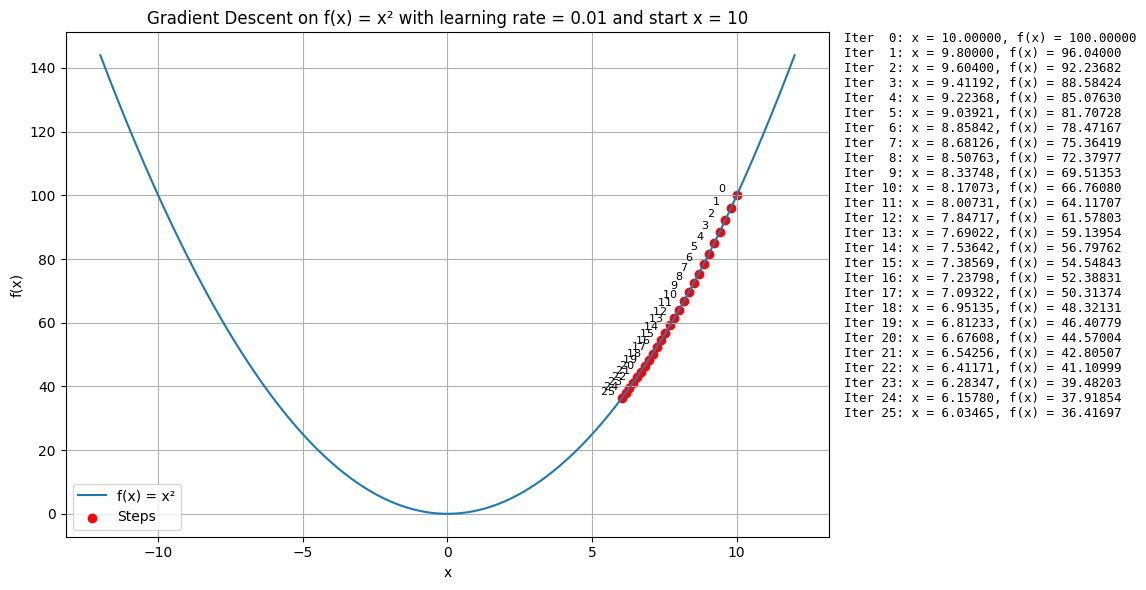

In [32]:
def f(x):
    return x**2

def df(x):
    return 2 * x

def gradient_descent_1d(start_x, learning_rate, num_iterations):
    x = start_x
    history = [(x, f(x))]  

    for i in range(num_iterations):
        grad = df(x)
        x = x - learning_rate * grad
        history.append((x, f(x)))
    
    return x, f(x), history

# ------- Parameters -------
#start_x = 10
start_x = random.randint(10,10) # 10 is the easiest example. Change the range for more complex examples
learning_rate = 0.01
num_iterations = 25

x_min, f_min, history = gradient_descent_1d(start_x, learning_rate, num_iterations)

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

ax0 = fig.add_subplot(gs[0])
x_vals = np.linspace(-12, 12, 400) # generate 400 numbers between -12 and 12
y_vals = f(x_vals)
ax0.plot(x_vals, y_vals, label='f(x) = x²')
xs, ys = zip(*history)
ax0.scatter(xs, ys, color='red', label='Steps')

for i, (x, y) in enumerate(history):
    ax0.text(x, y + 1, f"{i}        ", fontsize=8, ha='center')

ax0.set_title(f'Gradient Descent on f(x) = x² with learning rate = {learning_rate} and start x = {start_x}')
ax0.set_xlabel('x')
ax0.set_ylabel('f(x)')
ax0.grid(True)
ax0.legend()

ax1 = fig.add_subplot(gs[1])
ax1.axis('off')
text_lines = [f"Iter {i:2d}: x = {x:.5f}, f(x) = {y:.5f}" for i, (x, y) in enumerate(history)]
full_text = "\n".join(text_lines)
ax1.text(0, 1, full_text, va='top', fontsize=9, family='monospace')

plt.tight_layout()
plt.show()

Converges much slower than with a learning rate of 0.1. We would need more iterations for the gradient descent to find a minimum

### 2D Example

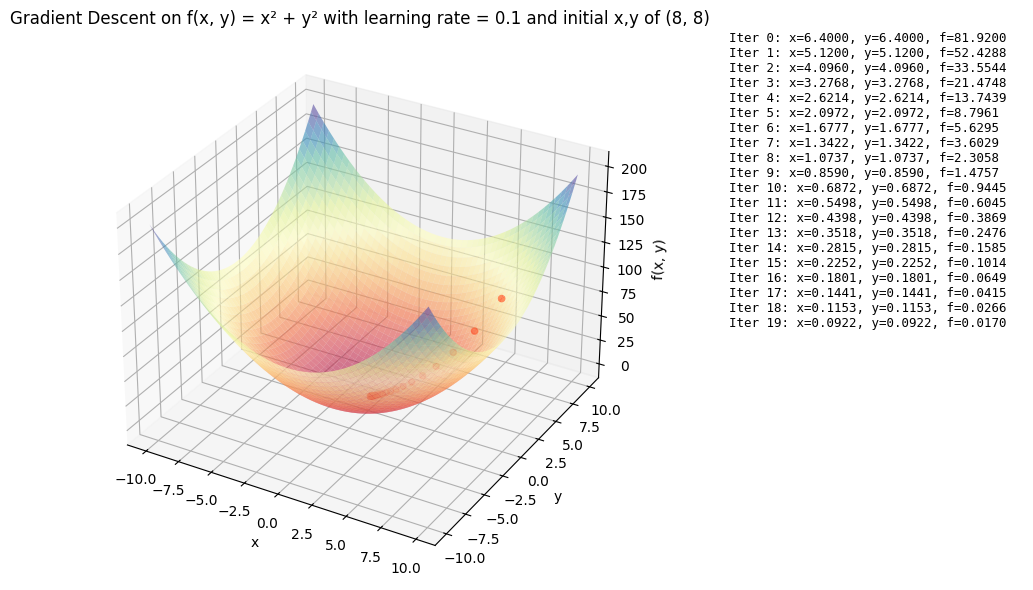

In [33]:
# function (ex. loss function)
def f(x, y):
    return x**2 + y**2

# partial derivatives of x and y
def df_dx(x, y):
    return 2 * x

def df_dy(x, y):
    return 2 * y

def gradient_descent(start_x, start_y, learning_rate, num_iterations):
    x = start_x
    y = start_y
    history = []
    
    for i in range(num_iterations):
        # Gradients
        grad_x = df_dx(x, y) 
        grad_y = df_dy(x, y)
        
        # Use negative Gradient * Learning rate to update 'weight'
        x = x - learning_rate * grad_x
        y = y - learning_rate * grad_y
        
        history.append((x, y, f(x, y)))
    
    return x, y, f(x, y), history

x_range = np.arange(-10, 10, 0.1)
y_range = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

start_x, start_y = 8, 8
learning_rate = 0.1
num_iterations = 20
x_opt, y_opt, f_opt, history = gradient_descent(start_x, start_y, learning_rate, num_iterations)

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 

ax0 = fig.add_subplot(gs[0], projection='3d')
ax0.plot_surface(X, Y, Z, cmap='Spectral', alpha=0.6)

xs, ys, zs = zip(*history)
ax0.scatter(xs, ys, zs, c='r', marker='o')
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_zlabel('f(x, y)')
ax0.set_title(f'Gradient Descent on f(x, y) = x² + y² with learning rate = {learning_rate} and initial x,y of {start_x, start_y}')

ax1 = fig.add_subplot(gs[1])
ax1.axis('off')  
text_lines = [f"Iter {i}: x={x:.4f}, y={y:.4f}, f={z:.4f}" for i, (x, y, z) in enumerate(history)]
full_text = "\n".join(text_lines)
ax1.text(0, 1, full_text, va='top', fontsize=9, family='monospace')

plt.tight_layout()
plt.show()

### Notes
new weight = old weight - (learning_rate * partial_derivative_of_that_weight)</br>
<=> 6.4 = 8 - (0.1 * 16) -> 16 = (x**2)' = 2*x = 2*8